In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
# import Particle Swarm Optimization algorithm
from PSO_algo import Particle
from PSO_algo import PSO

### Description:
We start by estimating the matrix $26 \times 26$ $\left(\alpha_{ij}\right)$ of Brazil. Since $\mu$ of Brazil is large, we estimate parameters such that the Brazil serotype frequencies correspond to the solution of the replicator dynamics at time $\tau=50$ with the same frequencies for all initial values $z_i(0)=1/n$, $1 \leq i \leq 26$. The target function for PSO algorithm satisfies that:\
i) For each matrix $\left(\alpha_{ij}\right)$, we calculate the $\Lambda$ matrix of pairwise invasion fitness, which allows us to have the solution for replicator dynamics at $\tau =50$. \
ii) For that solution, we sort it in descending order and compute the error between it and observation data of Brazil. We need this error to be minimal as possible.\
After fitting the parameters with PSO algorithm in range $\left[-10, 10\right]$ to attain the minimum error, we re-order the strains' name to have the $\alpha$ matrix with the right strains corresponding. Note that in PSO algorithm, we choose the range $\left[-10,10\right]$ for these $\alpha_{ij}$'s.

In [3]:
# data observation from 5 countries
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

# import name of serotypes and their frequencies from Brazil
Brazil_strain = np.array(Brazil.strain)
Brazil_cases = np.array(Brazil.cases)

# The number of serotypes reported in Brazil is:
strain_number = len(Brazil_strain) #=26
length = strain_number**2

# ratio of single to co-colonization prevalence: mu-values of Brazil
mu = 9.85

In [4]:
#initial value
u0 = (1/strain_number)*np.ones(strain_number)

#objective function for minimization
def func(vector):
    # insert alpha vector to Brazil_alpha
    vector = np.array(vector)
    # reshape it to 26x26 matrix- alpha matrix
    alpha_matrix = vector.reshape(strain_number, strain_number)
    
    #compute invasion fitness matrix Lambda
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]
    
    # compute the predicted frequencies, i.e. the solution of replicator equations at t = 50
    solution = Replicator(strain_number, lambd, 50, u0)
    
    # sort the frequencies by descending
    solution = sorted(solution, reverse=True) 
    
    # compute the error between observation data and predictied prevalence
    err = np.linalg.norm(solution - Brazil_cases)
    
    return err 

In [6]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

# Run the algorithm
PSO(func1, initial, bounds, num_particles = 400, maxiter = 2000)

FINAL:
[-1.0464641432369368, 0.5284114742330346, 0.29552193246419484, -0.6112491419383907, 0.6072573635562314, 0.5111901607212208, -0.22765474528609744, 0.3535329791226177, 0.2338186301578903, -0.6510626031436214, 0.1418997273569216, 1.3971500395739185, -0.5510432892836744, 0.29920608470656257, -0.1499871355508385, -0.4956745792045374, 0.2120936387581013, 0.884535769322305, 0.6018489982679742, -0.3217030903810379, 0.8016480327723118, -0.2992863996457852, -0.1232243613209059, 0.38354834925810877, 1.2112733373700142, -1.0491755256243196, 0.220682771346882, 0.02473420507238287, -0.05928036566883925, -0.01400087216416425, 1.1583669080088628, 0.47925355124631897, 0.2945238503889294, 0.4944795992019305, -0.8015892317372137, -0.2699698965332217, 0.7069750274755844, 0.7997245526729575, -0.020201326693516947, -0.09348041486835852, -0.357106346800501, -0.6326393166431674, 0.49457679737877064, -0.8580392757832631, 0.16514735248030543, 0.24374335724319704, 1.0964276460361733, -0.29437592349192626,

In [8]:
#import the matrix unarraged (initial version) to arrange it
Brazil_alpha_reorder = [-1.0464641432369368, 0.5284114742330346, 0.29552193246419484, -0.6112491419383907, 0.6072573635562314, 0.5111901607212208, -0.22765474528609744, 0.3535329791226177, 0.2338186301578903, -0.6510626031436214, 0.1418997273569216, 1.3971500395739185, -0.5510432892836744, 0.29920608470656257, -0.1499871355508385, -0.4956745792045374, 0.2120936387581013, 0.884535769322305, 0.6018489982679742, -0.3217030903810379, 0.8016480327723118, -0.2992863996457852, -0.1232243613209059, 0.38354834925810877, 1.2112733373700142, -1.0491755256243196, 0.220682771346882, 0.02473420507238287, -0.05928036566883925, -0.01400087216416425, 1.1583669080088628, 0.47925355124631897, 0.2945238503889294, 0.4944795992019305, -0.8015892317372137, -0.2699698965332217, 0.7069750274755844, 0.7997245526729575, -0.020201326693516947, -0.09348041486835852, -0.357106346800501, -0.6326393166431674, 0.49457679737877064, -0.8580392757832631, 0.16514735248030543, 0.24374335724319704, 1.0964276460361733, -0.29437592349192626, 0.1275437756088915, 0.44635610621133903, 0.03610446402882087, -0.010267582408260416, 1.1148963728576597, 0.3614633424625052, -0.35548060302063383, 0.3747487867236095, 0.32943168870857326, 0.47126449344486626, 1.5775362466969325, -0.3845157056591394, -0.31503532378736193, -0.9800503535003734, 0.5643929099798062, 0.2481316654298268, -0.7405011652651798, 1.3521397268461262, -1.0958749922219582, -0.1389709072687964, 1.192696753894756, 0.6120675221722018, 2.855096326790255, 0.31800357235574556, -1.2108767942460519, -0.01297084148724507, 0.941178229150626, 0.37138372014861093, -1.1046526381695725, 1.0576520239687903, -0.6479209928067525, -0.2009355877686823, 0.728128341739569, -0.9177961210314608, -0.5233860729373804, 0.4236722562191467, -0.5476552226542676, 0.13721640357149145, 0.8448640635963768, 1.380660151202822, 0.16136396651322438, 0.12723245681366172, -1.4507613352612831, 0.5909945655208099, -0.3208869693878103, -0.42458584508368097, -1.3258212649820944, -0.7918038099923479, -0.45481616283333226, -0.4132036448774446, -1.418401763718035, 0.1947128741845164, 0.9472923706866905, -0.09059233677721572, 0.27498169587661186, -0.2199015879306689, -1.200598556221651, -0.24568955959653435, -1.0570141751595108, -0.6422870869263357, -0.09983665134194179, 0.5503750316165266, 0.7000777185397536, -0.23678217139804086, -1.1144265093627947, 0.8296483274685078, 0.019274891368996298, -0.4992714318201608, -0.29525828600338555, 0.026658548862887058, -0.3749086992380738, 0.09003578708519631, -0.14378060355453479, 0.15729340417515936, -1.78138388169108, -0.8419960080724951, -1.4835762782577724, 0.14199683094420493, -0.5228968332246907, 1.010045287860239, -0.22714029540379466, -0.46468378124353643, 0.32056823028258563, 0.7047279875409412, 0.2803729047591492, 0.995554842766794, -0.962558401186394, -1.2022125908737786, -0.5173120334694218, 0.6715533207158365, 0.603387667690081, 0.08626723593367147, 0.3902582391397825, 0.4082893768929249, 1.0876614750008529, 0.6785027471672371, -0.9768160489679965, -0.08282798439187117, -3.251024382450019, -0.3383000172493897, 0.46393564126060305, -0.396654402083174, 0.11747844851466165, -0.519952487098258, -0.5679704922353793, 0.18653218164882196, 1.428556713897886, -0.5675323461277555, -0.6794195104673845, 0.3321101426783081, -0.7722642236000538, -1.5835101819230621, 0.692025672764234, 0.8395815351800112, -0.27104880182719004, 0.0802572187116068, 1.0347277567141264, -0.09248660144689666, -0.5025199570869341, 0.44085416752313417, -0.26013950194387947, -1.387383832358568, 0.021606376991229425, -0.6081748961944009, -1.2227296612759426, 0.06368082586057734, -0.0976155545290428, 0.5712894754531195, -0.44750600983376704, 0.8816377324462848, -0.4323089185347309, -0.40087044707831526, -0.23061515758675932, -1.1653582788724541, 0.704607583045559, 0.5290772874566955, 1.6066806412309658, 0.19950225303342317, -0.8094406478907747, 0.8408215687295252, -0.41063973344852667, -0.8110093931057482, -0.15399645134976722, 0.673643854071871, 0.4401223002546861, -0.26580373694857273, -2.3954524722161286, 0.8348937384804276, 0.7410596910130364, -0.48378895212511036, 1.6327470099999042, -0.3396647546040514, 1.5196696157574507, -1.9111381966760803, 0.238461148685913, 0.5602684806257122, 1.207909540624688, -0.3741861473995347, -0.7221042016309931, 0.68261693870921, 0.9511418835909924, -0.004071768411126332, 1.4576377378873278, 0.4471974173101156, -0.17617247788390858, -0.2635130636150444, -0.5104039140809185, -0.7960958074364012, -0.3135214446753899, 0.18114478500220496, -1.952664238943, 0.16969743321959202, 0.5187357839233944, 0.2736810602079912, -0.16767253200627638, 0.03537057501939199, 0.9121099328751603, 0.19757790421161867, 0.7853701230414805, -0.8299930648318233, 2.2617783470631854, 0.9295798034561331, 0.502639178188333, -0.13900575927115813, -0.9458221584753279, 0.2870787961474757, 0.7424669668456945, -0.3515617870676357, -0.5936112760440818, 0.5993431056198386, 0.40518026816022756, -0.5343049365386775, -0.10645112166673404, -0.03678486863151238, 0.7277096800614614, 2.274899452326013, -0.5858061959904286, -0.3832654475749503, 0.34389297762858095, 1.1588890307474882, -0.7262496555462107, -0.5756789911125894, 1.2764390243205455, 0.7904740491814763, -0.7390049661331619, -0.454977117510166, -0.5263306834973359, 0.20857081521529142, 0.7924504241553799, -1.1563867951191895, -0.028426337782327508, 0.514190972728818, 0.4925316025308242, -1.1329418679014147, 1.2086162781541983, 0.510795942250611, 0.7275906198770337, -0.6453297152396555, -0.09399314565379024, 0.31023983003098726, 0.23066785660266775, 0.21888179350504616, 0.09471963830996981, 0.7044364275094686, -0.455575317431493, 0.3936034186107145, 0.9405070592374917, 0.02851862060748682, 1.8021861248250985, 1.3744596825254722, 0.05806799408725303, 0.49576556697684904, -0.15548089465226436, 0.6490981474881808, 0.6002759915613753, 0.6981610325149225, 0.8147886589627887, -0.8171222471334295, 0.23627078327973813, -1.2087468524585143, -0.2624999434267991, 0.18957235207390136, 2.5349698901401783, -0.04413104017797628, 1.3378620907726482, 0.3361165316927725, 3.7293485946711153, -0.7054709136816582, 0.35771301384560744, 0.09859848168463689, -1.1586535501148907, 0.651358065800175, 1.7223742179805073, 1.10234539668082, -1.0521940075055551, -0.37695046115780445, -0.4802191277855112, -0.6160837291861876, 1.4520764585849402, -2.007379503850768, -0.09322599640712338, 0.14271377928669685, 0.7650368417260663, -0.8700025640854044, 0.5565384231528446, 0.6252676080236536, -0.0043073860789982375, 0.7031078897049439, 0.6415898968548908, -0.6469405952027838, -0.5712176011108185, -0.5072694078335993, 0.2133168482797626, -0.6905690928899858, 1.4169542937210051, -0.348968095270986, 0.5178020833001616, 0.2317099659250872, 0.34683962322088574, -0.3029763337766119, 0.14753315482511867, 0.021183759694158342, 0.5064095610733824, 0.7271558839801309, -0.08193064990418193, 0.5538724509312228, -0.18824840329629117, -1.1506577230348942, -0.611624355000841, 0.7567375666867838, -1.0082585662473342, -1.1195360373726415, -0.32824181426645754, 0.31958458572866644, 0.10229354023141851, -0.041680387498322785, 0.8687811837994621, 0.41839137368913093, -0.40722446309771165, -1.121892224686687, -0.38760131717901275, -0.062274150651884276, -0.9638736450094831, -0.18502471216608724, -0.743836722862025, -0.8040429940034323, -0.2791413004999933, 0.7336520174437133, -0.9718459265189939, 0.5995269312998669, -0.4673263840913779, 1.3876703500439247, 0.32463234218235826, 0.5316647875528101, 0.1677651377486736, -0.014303562349881355, 1.170217843736958, -0.6642365661090888, 0.6357159541745017, -0.806768815363605, -0.4436337305632107, -0.7932839317362153, -0.8800686336561773, -0.7454240657018308, 0.6962627976684943, -0.960147383198221, 1.3316725237597258, 0.053749540466955195, 0.8298277472013375, 1.0752860863161566, -0.46292386993640555, -0.17802881563481787, -0.774118266401952, -1.1337349830156747, 0.20622100259838624, 0.23908755645816357, 1.7170928958894072, -1.061994475065271, -0.9824975874717272, -0.23334171494235645, -0.9631862346125566, 0.1687264681118792, 0.35860845570924377, 0.1194387859535097, 1.2089154538986797, -1.033302568267079, 1.3436388954425031, -0.3895435880650748, -1.5884187174809516, 1.3732500877988958, -0.4992544945176871, 0.5780993268963004, 0.9033281940852231, 0.5100434607699629, -0.7394636170777567, 0.038896158275959054, -0.0937900663245169, -0.535395019999936, -0.5826873006608156, 0.5851346253187024, -1.2549934120636566, -0.6739618242142665, 0.6621715372950246, -0.8149912532655171, -1.0710326179996683, -0.6393444707615354, 0.16250992921911403, 2.3304737947926992, -1.1284938751869247, -0.252973565155648, -0.1727421244554438, -0.7032698955451392, -0.5364282430634524, -0.39211859275172417, 1.269079618235796, 0.2887581496111103, 0.003654870345050292, 0.5397834547416027, 0.029386529443760596, -0.9326258336079374, 1.1357270599889877, 0.5985850693519721, 0.3813031920510891, 1.2422041579634362, -0.5680066989043432, 0.34603220464813655, -0.20605335505280048, 0.2733499900833611, -0.055393086625942826, -1.0964688691057574, -0.403640312491151, -1.6165432091696657, 0.7517389215176321, -1.6526333353915077, 0.03088958276425685, 0.12700310142520962, 0.1340216230135041, -0.9126035611500563, -0.8608963684018399, 0.41205687792068957, 1.8244127373521215, 0.0689379191849726, 0.31709800894200757, -1.6346483051699356, -1.0372482169843105, -1.6300570532406355, 0.08157206670650947, 0.6510894707409268, -0.37974097918452054, -0.4371294289750613, 0.5335276944459741, 0.5956037748428197, 0.7203726863764613, 0.36351497027854107, 1.3358828761932193, 0.725102999266597, 0.05342870685917089, -0.7196275844525686, -0.3494337940904392, -0.37400860168006655, 0.8902757623480191, 2.03768402602014, 0.2031221292330795, 0.3041173870296767, 0.9185705255705887, 0.5763220582959434, -0.03989881018485867, -0.019873842206812344, 0.012419410902080682, 0.9082559120796917, -0.36797763979050957, 0.29543979167216966, 1.398806700619283, 1.2657018253286394, -0.5467818996566498, 0.03777408730353569, -0.9591844639330961, -0.2768407417964994, 0.5684692957767531, -0.3063993097366063, 0.29268028927589046, 0.23081016057314802, 0.16909444255123257, -0.8013925108638605, -0.626270092416325, 0.4614864503196118, -0.6172388586367958, 0.23021233752051418, -1.0510768782596405, -0.5594713570995293, 0.261821230780569, -0.288951770903582, 1.5639351763476597, 0.2087544692900176, 1.1002300100022115, 0.8720699869269251, 0.4599356696528801, -5.0, -0.03239489226336451, 0.14900826742536258, -0.24772717927957472, -0.45991200502834273, -0.19766506685761706, 0.5149412092843518, -0.1968871288588541, 0.9528714670883642, 0.18061997863982743, 0.29537031520753193, 0.5241142695586192, -1.439189543827712, -0.11154637378593445, 0.8021857633849007, -0.49787012841791534, 0.8563629719675413, 1.173381029457777, 0.00556718112311036, -1.349260716172944, 0.7211408481978816, 0.4505519917689828, 0.6882062647471183, 0.06731984335667912, 0.38974806508548987, 0.12433951271243274, 1.0815541796045185, -0.5252937927904318, -1.5793785252046384, 0.7698101737956726, 0.37634293371840183, 0.9683082311323442, -0.36887262688943484, 0.7514503337660937, 0.0796043221332362, -0.272662127540449, -0.5954570126299926, -0.39123789039831874, -0.5622733688842141, -0.28128704979297164, -0.5561124495242601, 0.21664162770771667, -0.18915590182619607, 0.8449164446794153, -0.46375725076017776, 0.22967681080663713, 0.2552536992839362, -0.35983439184703664, 0.0547923525576126, -0.7715492437491518, -0.5103487396839806, -1.5216245915577666, -0.5919806573028258, 0.25624762750325086, -0.3744769183134313, 0.6365459744698401, 0.8231181633625415, 0.11557387612503696, 0.43308344726273285, -0.31291933463424515, -0.9482757076404725, 0.4681277259129384, -0.2839201400334417, 0.9051728298419035, -1.4913552833738306, -0.912195810718077, -0.5867790172710983, 0.6774045656708048, -1.0992686592245537, -0.5580473545421778, 0.5282787907280624, -0.9972454741856194, -0.955358306503973, 0.762307690649824, 0.6724915382019923, 0.6480407788378695, 0.8237523208039257, 0.2355770200788572, -0.06748037319688922, 0.20001515952863055, -0.717328586968148, -0.18365793722108975, -0.18452747574184322, -0.12953094185910757, 0.2425716533131427, -0.0490822400832052, 0.7576018596650831, 0.47182102030405904, 0.80131430519351, 1.1180781060619078, 1.1361787164322426, -0.15093532066373666, -0.23772493683107074, 0.35679795661872477, 0.6468479015089293, -1.1182356843396415, -0.97211014396376, -0.3050342205109109, -0.8520666700644285, -0.0759257557553244, 1.1152401859822718, 0.09548177372966478, -1.159275305121962, 0.9388648959190834, 0.821384762333605, 0.1014693171236898, -2.128691068173077, -0.07236079113483707, 0.09953830190671595, -1.1400391277402284, -0.2478691024235136, 0.8755789715169248, 0.47311882621772644, 0.600019669101097, -0.27002776488838354, 0.3121583152836945, -1.4522202900593224, -0.6169876354700448, -0.34267440698091506, 0.5555227730751454, -1.2506567110347, 0.8302833914448701, -0.5368987281447056, -0.7870963508181014, 0.22480925622698544, 0.10456657383098619, -0.16506885017848932, -0.7012464443403243, -1.9777946555458006, 0.6979371278118244, -0.5455378664477506, 0.06138388004552559, -0.10302585324671297, -0.8996904024714801, -1.0370680742125864, 0.23406425878792061, -1.29163701705438, 0.519447907378013, -1.287082841274574, 0.5677690193601563, 0.8026714817898657, 0.1310595983163284, 0.3106273060424961, 0.3710866511861585, -0.22729862133817821, 0.020438217890575643, 0.7660985173324929, -0.7314597591174802, 0.006016635527821751, -1.2423398231300962, 0.3841539162741942, 0.007504833854123876, -0.8366826811696279, 0.39103982993839287, -0.27646061437546476, -1.3109178327750584, -0.8932032671612145, -0.5130344794646381, 0.7332848456321085, -0.0077933160913308585, -1.5819328641664243, -0.5827734221963298, -0.8791054846249057, -0.0009151489094724446, 0.19389775254430908, -5.0, 0.5251134562879873, -0.3130786700854194, 0.9379088399145263, 1.1412565734931088, 0.4151619520128691]
Brazil_alpha_reorder = np.array(Brazil_alpha_reorder).reshape(strain_number, strain_number) #reshape into 26x26 matrix

#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Brazil_alpha_reorder[j][i] - Brazil_alpha_reorder[i][j]) + Brazil_alpha_reorder[j][i] - Brazil_alpha_reorder[j][j]

#UNSORTED SOLUTION        
solution = Replicator(strain_number, lambd, 50, u0)
unsort_Brazil_predict = {'cases':  solution}
unsort_Brazil_predict = pd.DataFrame(unsort_Brazil_predict)

prediction = solution #predicted prevalence -- for the final test

#SORT SOLUTION
sort_Brazil_predict = unsort_Brazil_predict.sort_values(['cases'], ascending = False)
new_index = np.array(sort_Brazil_predict.index, dtype = float) #index for re-order real data

In [9]:
#re-arrange observation data of Brazil
#find the appropriate index
data_new_index = np.zeros(strain_number)
Brazil_index = np.array(Brazil.index)
for i in range (0, strain_number):
    temp = np.where(new_index == i)
    data_new_index[i] = Brazil_index[temp[0]]

print(data_new_index)

[13. 14. 21.  5. 15.  0. 16.  6. 23. 18. 19. 20. 12.  9.  2. 22. 25. 24.
  8. 17.  4.  3.  7.  1. 11. 10.]


In [14]:
# find the new order of serotypes' name corresponding to the unsorted alpha matrix
Brazil_data_reorder = Brazil.reindex(data_new_index)
Brazil_strain_reorder = np.array(Brazil_data_reorder.strain)
print(Brazil_strain_reorder)

# save the Brazil's strain of new order which is corresponding to the predicted alpha matrix (unsorted one)
Brazil_strain_reorder = np.array(['23B', '18', '1', '23F', '23A', '6B', '3', '16F', '12F', '15A', '34', '39', '11A',
                         '19A', '14', '9N', '35B', '29', '6', '10A', '15C', '6A', '17F', '19F', '6C', '4'])

['23B' '18' '1' '23F' '23A' '6B' '3' '16F' '12F' '15A' '34' '39' '11A'
 '19A' '14' '9N' '35B' '29' '6' '10A' '15C' '6A' '17F' '19F' '6C' '4']


In [15]:
# reorder the alpha matrix such that corresponding to the order of serotypes in the data observation (in descendent order of prevalence)
Brazil_alpha = np.ones((strain_number, strain_number))

# find the position of the serotypes and then insert the values of alpha_ij
for xB, strain_xB in enumerate(Brazil_strain):
    for yB, strain_yB in enumerate(Brazil_strain):
        find_xBrazil = np.where(Brazil_strain_reorder == strain_xB)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain_reorder == strain_yB)
        index_yBrazil = find_yBrazil[0]
        
        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Brazil_alpha[xB, yB] = Brazil_alpha_reorder[index_xBrazil, index_yBrazil]

In [19]:
#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

# Test if the alpha matrix is already valid, i.e. leading to the serotypes' frequencies approximating the frequencies in data observation
# compute invasion fitness matrix
for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Brazil_alpha[j][i] - Brazil_alpha[i][j]) + Brazil_alpha[j][i] - Brazil_alpha[j][j]
# compute frequencies, i.e. solution at t=50 of replicator system
solution = Replicator(strain_number, lambd, 50, u0)
# compute and print the error
err = np.linalg.norm(solution - Brazil_cases)
print(err) #the error is valid so we can save the Brazil alpha matrix

# save the Brazil alpha matrix
np.savetxt('Brazil_alpha.txt', Brazil_alpha, delimiter = ',')

0.015207046376067058


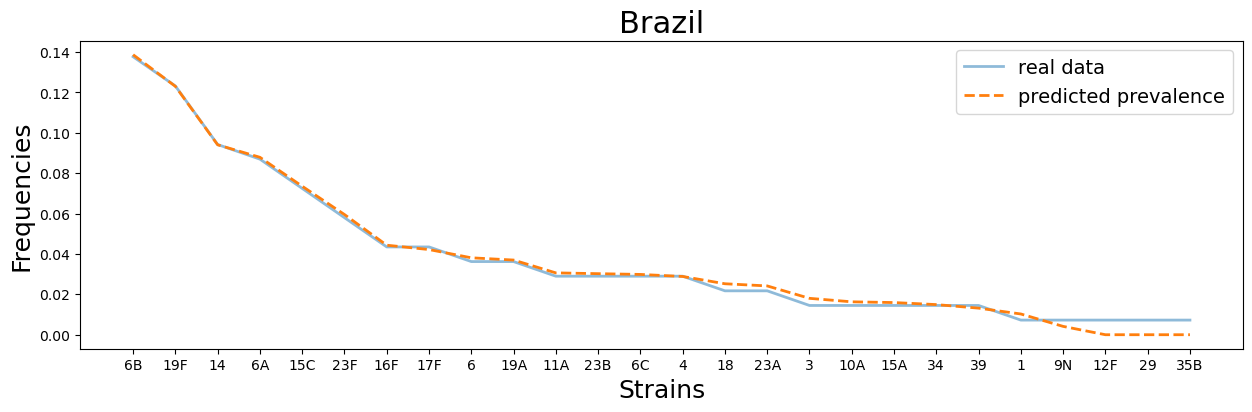

In [17]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Brazil.strain)

fig = plt.figure(figsize = (15, 4))
plt.plot(range_strain, Brazil_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Brazil', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()